In [1]:
import numpy as np
from qiskit_dynamics.signals import DiscreteSignal, Sampler, IQMixer, Signal
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
dt = 0.25
in_phase = DiscreteSignal(dt, [1.0]*200, carrier_freq=0.1, phase=0)
quadrature = DiscreteSignal(dt, [1.0]*200, carrier_freq=0.1, phase=-np.pi/2)

sampler = Sampler(dt/25, 5000)
in_phase = sampler(in_phase)
quadrature = sampler(quadrature)

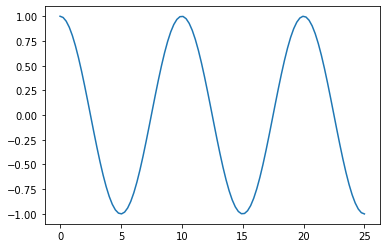

In [3]:
in_phase.draw(0, 25, 100)

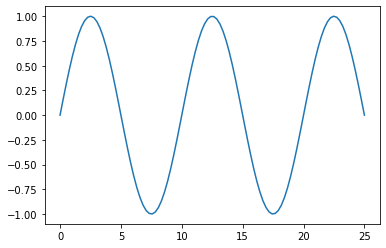

In [4]:
quadrature.draw(0, 25, 100)

In [5]:
mixer = IQMixer(4.9)

In [6]:
rf = mixer(in_phase, quadrature)

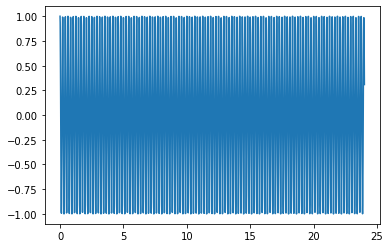

In [7]:
rf.draw(0, 24, 2000)

(4.6, 5.4)

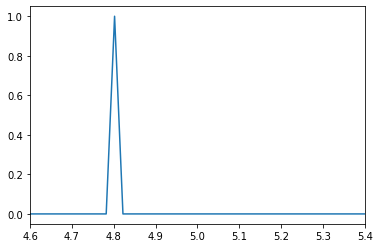

In [8]:
import scipy.fftpack

rf_samples = DiscreteSignal.from_Signal(rf, dt=dt/25, n_samples=5000).samples
N = len(rf_samples)
T = dt/25
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(np.real(rf_samples))
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim([4.6, 5.4])

## Do the same with Signal

In [9]:
in_phase = Signal(1.0, carrier_freq=0.1, phase=0)
quadrature = Signal(0.95, carrier_freq=0.1, phase=-np.pi/2)

In [10]:
rf = mixer(in_phase, quadrature)

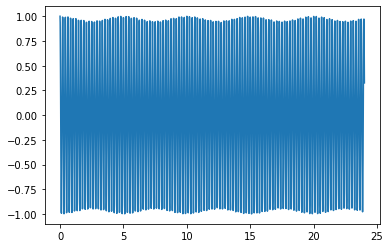

In [11]:
rf.draw(0, 24, 2000)

(4.6, 5.4)

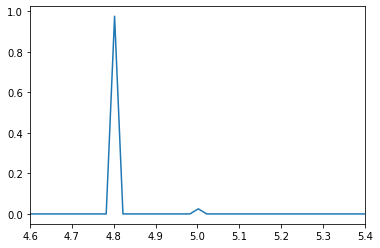

In [12]:
dt = 0.01
samples = DiscreteSignal.from_Signal(rf, dt=dt, n_samples=5000).samples

N = len(samples)
T = dt
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(np.real(samples))
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim([4.6, 5.4])

In [13]:
xf[np.argmax(np.abs(yf[:len(samples) // 2]))]

4.8019207683073235